# Trajectory Sampling

To isolate the effect of the update distribution, we used entirely one-step expected tabular updates, as defined by (8.1).
- In the:
  - uniform case, we cycled through all state–action pairs, updating each in place,
  - on-policy case, we simulated episodes, all starting in the same state, updating each state–action pair that occurred under the current $\varepsilon=0.1$-greedy policy.
- The tasks were undiscounted episodic tasks, generated randomly as follows.
  - From each of the $|S|$ states, 2 actions were possible, each of which resulted in one of $b$ next states, all equally likely, with a different random selection of $b$ states for each state–action pair.
  - The branching factor, $b$, was the same for all state–action pairs.
  - In addition, on all transitions there was a 0.1 probability of transition to the terminal state, ending the episode.
  - The expected reward on each transition was selected from a Gaussian distribution with $\mu=0$ mean and $\sigma=1$ variance.
- At any point in the planning process one can stop and exhaustively compute $v_\~\pi(s_0)$, the true value of the start state under the greedy policy, $\~\pi$, given the current action-value function $Q$, as an indication of how well the agent would do on a new episode on which it acted greedily (all the while assuming the model is correct).

The figure below shows results averaged over 200 sample tasks with 1000 states and branching factors of 1, 3, and 10.
- The quality of the policies found is plotted as a function of the number of expected updates completed.
- In all cases, sampling according to the on-policy distribution resulted in faster planning initially and retarded planning in the long run.
- The effect was stronger, and the initial period of faster planning was longer, at smaller branching factors.

In [1]:
from IPython.display import Image

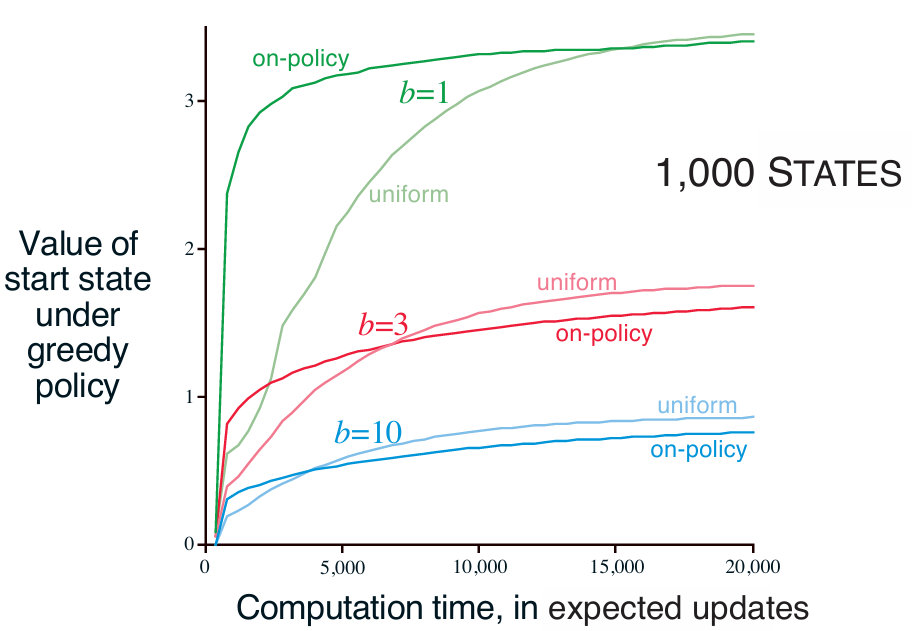

In [2]:
Image(filename="../book_images/Figure_8_8_1.PNG")

In other experiments, we found that these effects also became stronger as the number of states increased.
- For example, the figure below shows results for a branching factor of 1 for tasks with 10,000 states.
- In this case the advantage of on-policy focusing is large and long-lasting.

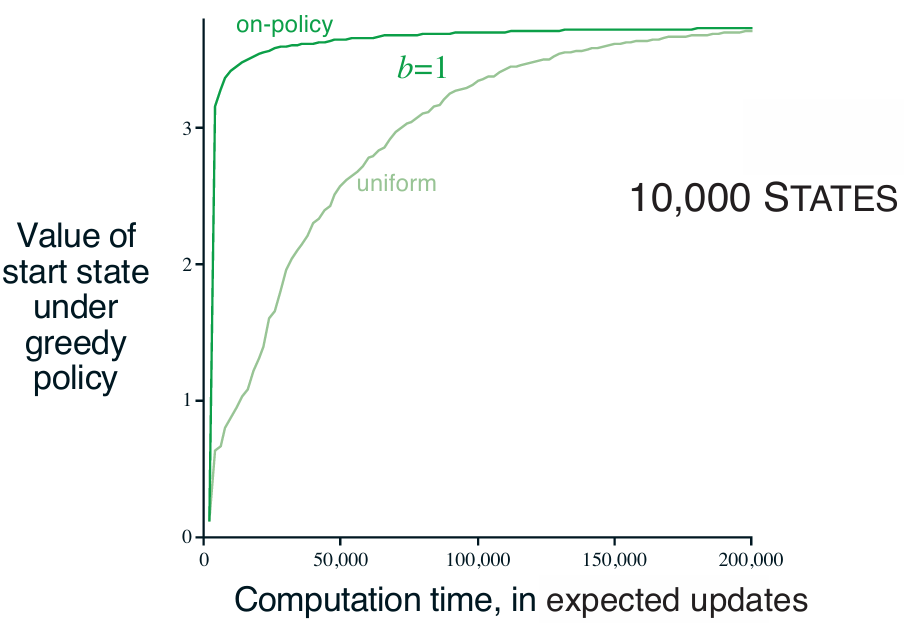

In [3]:
Image(filename="../book_images/Figure_8_8_2.PNG")

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.use('Agg')

In [ ]:
from src.trajectory_sampling import on_policy_sampling, uniform_sampling, run_experiment

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)

In [ ]:
# List of numbers of states
num_states = [1000, 10000]

# List of branch factors
branch_factors = [1, 3, 10]

# List of methods
methods = [on_policy_sampling, uniform_sampling]

In [ ]:
plt.figure(figsize=(12, 16))

In [ ]:
# For every number of states
for i, n_states in enumerate(num_states):
    plt.subplot(2, 1, i + 1)

    # for every branch factor
    for branch_factor in branch_factors:
        # get the results of each method
        results = run_experiment(n_states, branch_factor, methods)

        # for every method
        for method_name, (steps, values) in results.items():
            label = f'b={branch_factor}, {method_name.replace("_", "-")}'
            plt.plot(steps, values, label=label, linewidth=2)

    # plotting
    plt.title(f'{n_states:,} states', fontsize=14, fontweight='bold')
    plt.ylabel("Value of start state\nunder greedy policy", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

In [ ]:
plt.subplot(2, 1, 2)
plt.xlabel("Computation time, in expected updates", fontsize=12)
plt.tight_layout()
plt.savefig("../generated_images/figure_8_8.png", dpi=300, bbox_inches='tight')
plt.close()